In [13]:
pip install pynytimes nytimes-scraper pandas matplotlib seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install requests pandas matplotlib transformers nytimes_scraper

Note: you may need to restart the kernel to use updated packages.


In [9]:
import requests
import pandas as pd
import time
import matplotlib.pyplot as plt

# Hugging Face pipeline for sentiment analysis
from transformers import pipeline

# nytimes_scraper for fetching reader comments
from nytimes_scraper.nyt_api import NytApi
from nytimes_scraper.comments import fetch_comments_by_article, comments_to_df

In [43]:
API_KEY = "pT8fkP6axuZgyWndn84hi2GH0SbUZHe6"  # Must have Article Search access
nyt_search = NYTAPI(API_KEY, parse_dates=True)

# Define a date range
start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime(2024, 2, 1)

# Use the 'fq' parameter to filter for type_of_material=Review
# This helps ensure we get actual reviews rather than generic articles
articles = nyt_search.article_search(
    query="movies",
    results=50,  # number of articles to fetch
    dates={"begin": start_date, "end": end_date},
    options={
        "sort": "relevance",
        "fq": 'type_of_material:("Review")'
    }
)

# Build a DataFrame
article_data = []
for a in articles:
    article_data.append({
        "headline": a["headline"]["main"],
        "abstract": a["abstract"],
        "url": a["web_url"],
        "byline": a["byline"].get("original", "") if a.get("byline") else "",
        "pub_date": a["pub_date"]
    })

critic_df = pd.DataFrame(article_data)
print("Potential Critic Reviews from Article Search:")
print(critic_df.head())

Potential Critic Reviews from Article Search:
                                            headline  \
0  ‘Dario Argento Panico’ Review: When He Says ‘C...   
1             ‘Fitting In’ Review: Her Body, Herself   
2    ‘She Is Conann’ Review: Queen of the Barbarians   
3  ‘Disco Boy’ Review: Pawns in a Bigger Game Str...   
4                     ‘Bushman’ Review: Outsider Art   

                                            abstract  \
0  This jam-packed portrait of the revered Italia...   
1  Maddie Ziegler plays a teen who is diagnosed w...   
2  This feminist riff on “Conan the Barbarian” is...   
3  This feature debut from the Italian director G...   
4  A 1971 indie whose making was disrupted by its...   

                                                 url                  byline  \
0  https://www.nytimes.com/2024/02/01/movies/dari...  By Jeannette Catsoulis   
1  https://www.nytimes.com/2024/02/01/movies/fitt...    By Natalia Winkelman   
2  https://www.nytimes.com/2024/02/01/mo

In [44]:
nyt_api = NytApi(API_KEY)  # The same key often isn't strictly required by nytimes_scraper

all_comments_list = []

for idx, row in critic_df.iterrows():
    article_url = row["url"]
    print(f"Scraping comments for: {article_url}")
    try:
        raw_comments = fetch_comments_by_article(nyt_api, article_url)
        comment_df = comments_to_df(raw_comments)
        if not comment_df.empty:
            # Tag these comments with the corresponding article
            comment_df["headline"] = row["headline"]
            comment_df["url"] = article_url
            all_comments_list.append(comment_df)
            print(f"  Found {len(comment_df)} comments.")
        else:
            print("  No comments found.")
    except Exception as e:
        print(f"  Error scraping comments: {e}")
    time.sleep(1)  # avoid hammering the server

if all_comments_list:
    comments_df = pd.concat(all_comments_list, ignore_index=True)
else:
    comments_df = pd.DataFrame()

print("Reader Comments DataFrame:")
print(comments_df.head())

Scraping comments for: https://www.nytimes.com/2024/02/01/movies/dario-argento-panico-review.html
  Error scraping comments: "None of ['commentID'] are in the columns"
Scraping comments for: https://www.nytimes.com/2024/02/01/movies/fitting-in-review.html
  Error scraping comments: "None of ['commentID'] are in the columns"
Scraping comments for: https://www.nytimes.com/2024/02/01/movies/she-is-conann-review.html
  Error scraping comments: "None of ['commentID'] are in the columns"
Scraping comments for: https://www.nytimes.com/2024/02/01/movies/disco-boy-review-pawns-struggle.html
  Error scraping comments: "None of ['commentID'] are in the columns"
Scraping comments for: https://www.nytimes.com/2024/02/01/movies/bushman-review-outsider-art.html
  Error scraping comments: "None of ['commentID'] are in the columns"
Scraping comments for: https://www.nytimes.com/2024/02/01/movies/argylle-review.html


/opt/anaconda3/lib/python3.12/site-packages/nytimes_scraper/comments/postprocessing.py:21: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df[col] = pd.to_datetime(df[col], unit='s')
/opt/anaconda3/lib/python3.12/site-packages/nytimes_scraper/comments/postprocessing.py:21: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df[col] = pd.to_datetime(df[col], unit='s')
/opt/anaconda3/lib/python3.12/site-packages/nytimes_scraper/comments/postprocessing.py:21: FutureWarning: The behavior of 't

  Found 21 comments.
Scraping comments for: https://www.nytimes.com/2024/02/01/movies/the-promised-land-review-mads-mikkelsen.html
  Error scraping comments: "None of ['commentID'] are in the columns"
Scraping comments for: https://www.nytimes.com/2024/02/01/movies/skin-deep-review.html
  Error scraping comments: "None of ['commentID'] are in the columns"
Scraping comments for: https://www.nytimes.com/2024/02/01/movies/how-to-have-sex-review.html
  Error scraping comments: "None of ['commentID'] are in the columns"
Scraping comments for: https://www.nytimes.com/2024/01/25/movies/pictures-of-ghosts-review.html
  Error scraping comments: "None of ['commentID'] are in the columns"
Scraping comments for: https://www.nytimes.com/2024/01/25/movies/the-peasants-review.html
  Error scraping comments: "None of ['commentID'] are in the columns"
Scraping comments for: https://www.nytimes.com/2024/01/25/movies/underdoggs-review-coach-snoop-dogg.html
  Error scraping comments: "None of ['commentID'

/opt/anaconda3/lib/python3.12/site-packages/nytimes_scraper/comments/postprocessing.py:21: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df[col] = pd.to_datetime(df[col], unit='s')
/opt/anaconda3/lib/python3.12/site-packages/nytimes_scraper/comments/postprocessing.py:21: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df[col] = pd.to_datetime(df[col], unit='s')
/opt/anaconda3/lib/python3.12/site-packages/nytimes_scraper/comments/postprocessing.py:21: FutureWarning: The behavior of 't

  Found 4 comments.
Scraping comments for: https://www.nytimes.com/2024/01/11/movies/lift-review-kevin-hart-action-flick.html
  Error scraping comments: "None of ['commentID'] are in the columns"
Scraping comments for: https://www.nytimes.com/2024/01/11/movies/role-play-review.html
  Error scraping comments: "None of ['commentID'] are in the columns"
Scraping comments for: https://www.nytimes.com/2024/01/11/movies/self-reliance-review.html
  Error scraping comments: "None of ['commentID'] are in the columns"
Scraping comments for: https://www.nytimes.com/2024/01/11/movies/the-settlers-review.html
  Error scraping comments: "None of ['commentID'] are in the columns"
Scraping comments for: https://www.nytimes.com/2024/01/11/movies/mean-girls-review.html


/opt/anaconda3/lib/python3.12/site-packages/nytimes_scraper/comments/postprocessing.py:21: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df[col] = pd.to_datetime(df[col], unit='s')
/opt/anaconda3/lib/python3.12/site-packages/nytimes_scraper/comments/postprocessing.py:21: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df[col] = pd.to_datetime(df[col], unit='s')
/opt/anaconda3/lib/python3.12/site-packages/nytimes_scraper/comments/postprocessing.py:21: FutureWarning: The behavior of 't

  Found 67 comments.
Scraping comments for: https://www.nytimes.com/2024/01/11/movies/driving-madeleine-review.html
  Error scraping comments: "None of ['commentID'] are in the columns"
Scraping comments for: https://www.nytimes.com/2024/01/11/movies/inshallah-a-boy-review-where-the-male-line-is-the-only-line.html
  Error scraping comments: "None of ['commentID'] are in the columns"
Scraping comments for: https://www.nytimes.com/2024/01/11/movies/the-book-of-clarence-review.html
  Error scraping comments: "None of ['commentID'] are in the columns"
Scraping comments for: https://www.nytimes.com/2024/01/10/movies/the-beekeeper-review.html


/opt/anaconda3/lib/python3.12/site-packages/nytimes_scraper/comments/postprocessing.py:21: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df[col] = pd.to_datetime(df[col], unit='s')
/opt/anaconda3/lib/python3.12/site-packages/nytimes_scraper/comments/postprocessing.py:21: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df[col] = pd.to_datetime(df[col], unit='s')
/opt/anaconda3/lib/python3.12/site-packages/nytimes_scraper/comments/postprocessing.py:21: FutureWarning: The behavior of 't

  Found 16 comments.
Scraping comments for: https://www.nytimes.com/2024/01/04/movies/night-swim-review.html
  Error scraping comments: "None of ['commentID'] are in the columns"
Scraping comments for: https://www.nytimes.com/2024/01/04/movies/mayhem-review.html
  Error scraping comments: "None of ['commentID'] are in the columns"
Scraping comments for: https://www.nytimes.com/2024/01/04/movies/he-went-that-way-review.html
  Error scraping comments: "None of ['commentID'] are in the columns"
Scraping comments for: https://www.nytimes.com/2024/01/04/movies/society-of-the-snow-review.html
  Error scraping comments: "None of ['commentID'] are in the columns"
Scraping comments for: https://www.nytimes.com/2024/01/04/movies/good-grief-review.html
  Error scraping comments: "None of ['commentID'] are in the columns"
Scraping comments for: https://www.nytimes.com/2024/01/04/movies/memory-review.html


/opt/anaconda3/lib/python3.12/site-packages/nytimes_scraper/comments/postprocessing.py:21: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df[col] = pd.to_datetime(df[col], unit='s')
/opt/anaconda3/lib/python3.12/site-packages/nytimes_scraper/comments/postprocessing.py:21: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df[col] = pd.to_datetime(df[col], unit='s')
/opt/anaconda3/lib/python3.12/site-packages/nytimes_scraper/comments/postprocessing.py:21: FutureWarning: The behavior of 't

  Found 3 comments.
Scraping comments for: https://www.nytimes.com/2023/12/26/movies/rose-review-my-sisters-keeper.html
  Error scraping comments: "None of ['commentID'] are in the columns"
Scraping comments for: https://www.nytimes.com/2023/12/24/movies/ferrari-review-michael-mann.html
  Error scraping comments: "None of ['commentID'] are in the columns"
Scraping comments for: https://www.nytimes.com/2023/12/24/movies/the-crime-is-mine-review-courtroom-tango.html
  Error scraping comments: "None of ['commentID'] are in the columns"
Scraping comments for: https://www.nytimes.com/2023/12/24/movies/the-teachers-lounge-review.html
  Error scraping comments: "None of ['commentID'] are in the columns"
Scraping comments for: https://www.nytimes.com/2023/12/24/movies/the-boys-in-the-boat-review.html
  Error scraping comments: "None of ['commentID'] are in the columns"
Scraping comments for: https://www.nytimes.com/2023/12/21/movies/aquaman-and-the-lost-kingdom-review.html
  Error scraping com

In [45]:
# Initialize the Hugging Face pipeline
sentiment_analyzer = pipeline("sentiment-analysis")

def analyze_text(text):
    if not text or not isinstance(text, str):
        return {"label": "NEUTRAL", "score": 0.0}
    try:
        return sentiment_analyzer(text)[0]  # returns e.g. {"label": "POSITIVE", "score": 0.998}
    except:
        return {"label": "ERROR", "score": 0.0}
    

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


In [46]:
critic_df["critic_sentiment"] = critic_df["abstract"].apply(analyze_text)
critic_df["critic_label"] = critic_df["critic_sentiment"].apply(lambda x: x["label"])
critic_df["critic_score"] = critic_df["critic_sentiment"].apply(lambda x: x["score"])

print("Critic Reviews with Sentiment:")
print(critic_df[["headline", "critic_label", "critic_score"]].head())

Critic Reviews with Sentiment:
                                            headline critic_label  \
0  ‘Dario Argento Panico’ Review: When He Says ‘C...     POSITIVE   
1             ‘Fitting In’ Review: Her Body, Herself     NEGATIVE   
2    ‘She Is Conann’ Review: Queen of the Barbarians     NEGATIVE   
3  ‘Disco Boy’ Review: Pawns in a Bigger Game Str...     POSITIVE   
4                     ‘Bushman’ Review: Outsider Art     NEGATIVE   

   critic_score  
0      0.997804  
1      0.982732  
2      0.992495  
3      0.998251  
4      0.996935  


In [47]:
if not comments_df.empty and "commentBody" in comments_df.columns:
    comments_df["comment_sentiment"] = comments_df["commentBody"].apply(analyze_text)
    comments_df["comment_label"] = comments_df["comment_sentiment"].apply(lambda x: x["label"])
    comments_df["comment_score"] = comments_df["comment_sentiment"].apply(lambda x: x["score"])
    print("Comments with Sentiment:")
    print(comments_df[["headline", "commentBody", "comment_label", "comment_score"]].head())
else:
    print("No comments to analyze.")

Comments with Sentiment:
                                 headline  \
0  ‘Argylle’ Review: A Cat Cannot Save It   
1  ‘Argylle’ Review: A Cat Cannot Save It   
2  ‘Argylle’ Review: A Cat Cannot Save It   
3  ‘Argylle’ Review: A Cat Cannot Save It   
4  ‘Argylle’ Review: A Cat Cannot Save It   

                                         commentBody comment_label  \
0  Perhaps the most wonderful thing about this wo...      POSITIVE   
1  @Bree  All of these types of movies are becomi...      NEGATIVE   
2  "What threw me for a loop was that the song wa...      NEGATIVE   
3  @David \nRead it again. I don't think the revi...      POSITIVE   
4  @David They can't film scenes with characters ...      NEGATIVE   

   comment_score  
0       0.999837  
1       0.999765  
2       0.995570  
3       0.607057  
4       0.972027  


In [48]:
if not comments_df.empty and "comment_score" in comments_df.columns:
    avg_comment_sent = (
        comments_df
        .groupby("url")["comment_score"]
        .mean()
        .reset_index()
        .rename(columns={"comment_score": "avg_reader_score"})
    )
    # Merge on the URL
    merged_df = pd.merge(critic_df, avg_comment_sent, left_on="url", right_on="url", how="left")
    print("Merged Critic vs. Reader Sentiment:")
    print(merged_df[["headline", "critic_score", "avg_reader_score"]].head())
else:
    merged_df = critic_df.copy()
    merged_df["avg_reader_score"] = None
    print("No reader comment sentiment to merge.")

Merged Critic vs. Reader Sentiment:
                                            headline  critic_score  \
0  ‘Dario Argento Panico’ Review: When He Says ‘C...      0.997804   
1             ‘Fitting In’ Review: Her Body, Herself      0.982732   
2    ‘She Is Conann’ Review: Queen of the Barbarians      0.992495   
3  ‘Disco Boy’ Review: Pawns in a Bigger Game Str...      0.998251   
4                     ‘Bushman’ Review: Outsider Art      0.996935   

   avg_reader_score  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  


In [49]:
print("critic_df columns:", critic_df.columns)
print("comments_df columns:", comments_df.columns)

critic_df columns: Index(['headline', 'abstract', 'url', 'byline', 'pub_date', 'critic_sentiment',
       'critic_label', 'critic_score'],
      dtype='object')
comments_df columns: Index(['status', 'commentSequence', 'userID', 'userDisplayName',
       'userLocation', 'userTitle', 'userURL', 'picURL', 'commentTitle',
       'commentBody', 'createDate', 'updateDate', 'approveDate',
       'recommendations', 'replyCount', 'editorsSelection', 'parentID',
       'parentUserDisplayName', 'depth', 'commentType', 'trusted',
       'recommendedFlag', 'permID', 'isAnonymous', 'headline', 'url',
       'comment_sentiment', 'comment_label', 'comment_score'],
      dtype='object')


In [51]:
print(list(comments_df.columns))

['status', 'commentSequence', 'userID', 'userDisplayName', 'userLocation', 'userTitle', 'userURL', 'picURL', 'commentTitle', 'commentBody', 'createDate', 'updateDate', 'approveDate', 'recommendations', 'replyCount', 'editorsSelection', 'parentID', 'parentUserDisplayName', 'depth', 'commentType', 'trusted', 'recommendedFlag', 'permID', 'isAnonymous', 'headline', 'url', 'comment_sentiment', 'comment_label', 'comment_score']


In [52]:
critic_urls = set(critic_df["url"].unique())
comment_urls = set(comments_df["url"].unique())
overlap = critic_urls.intersection(comment_urls)
print("Number of overlapping URLs:", len(overlap))

Number of overlapping URLs: 5


In [53]:
critic_urls = set(critic_df["url"].unique())
comment_urls = set(comments_df["url"].unique())
overlap = critic_urls.intersection(comment_urls)
print("Overlapping URLs:", overlap)

Overlapping URLs: {'https://www.nytimes.com/2024/01/04/movies/memory-review.html', 'https://www.nytimes.com/2024/01/18/movies/iss-review-ariana-debose.html', 'https://www.nytimes.com/2024/01/10/movies/the-beekeeper-review.html', 'https://www.nytimes.com/2024/01/11/movies/mean-girls-review.html', 'https://www.nytimes.com/2024/02/01/movies/argylle-review.html'}


In [56]:
for url in overlap:
    print("\nCritic DF row(s) for:", url)
    print(critic_df[critic_df["url"] == url])

    print("Comments DF row(s) for:", url)
    print(comments_df[comments_df["url"] == url])


Critic DF row(s) for: https://nytimes.com/2024/01/10/movies/the-beekeeper-review.html
                                          headline  \
31  ‘The Beekeeper’ Review: Sting Like a, You Know   

                                             abstract  \
31  In this action thriller, Jason Statham plays a...   

                                                  url            byline  \
31  https://nytimes.com/2024/01/10/movies/the-beek...  By Amy Nicholson   

                    pub_date  \
31 2024-01-10 19:00:06+00:00   

                                     critic_sentiment critic_label  \
31  {'label': 'POSITIVE', 'score': 0.9982428550720...     POSITIVE   

    critic_score  
31      0.998243  
Comments DF row(s) for: https://nytimes.com/2024/01/10/movies/the-beekeeper-review.html
       status  commentSequence     userID     userDisplayName  \
92   approved        130388565  219858624            Adivinho   
93   approved        130389603   96240573         Sean Malloy   
94   approv

In [57]:
def normalize_url(u):
    if not u: 
        return u
    # Remove "www." or trailing slash, for instance:
    u = u.replace("www.", "")
    if u.endswith("/"):
        u = u[:-1]
    return u.strip()

critic_df["url"] = critic_df["url"].apply(normalize_url)
comments_df["url"] = comments_df["url"].apply(normalize_url)

# Check overlap again after normalization
critic_urls = set(critic_df["url"].unique())
comment_urls = set(comments_df["url"].unique())
overlap = critic_urls.intersection(comment_urls)
print("Overlapping URLs after normalization:", overlap)

Overlapping URLs after normalization: {'https://nytimes.com/2024/01/10/movies/the-beekeeper-review.html', 'https://nytimes.com/2024/01/04/movies/memory-review.html', 'https://nytimes.com/2024/01/18/movies/iss-review-ariana-debose.html', 'https://nytimes.com/2024/01/11/movies/mean-girls-review.html', 'https://nytimes.com/2024/02/01/movies/argylle-review.html'}


In [58]:
# Group comments by 'url' and calculate the average comment sentiment score
avg_comment_sent = (
    comments_df.groupby("url")["comment_score"]
    .mean()
    .reset_index()
    .rename(columns={"comment_score": "avg_reader_score"})
)

# Merge critic_df with the average reader sentiment on the 'url' column
merged_df = pd.merge(
    critic_df,
    avg_comment_sent,
    on="url",
    how="left"
)

print("Merged DataFrame:")
print(merged_df[["headline", "critic_score", "avg_reader_score"]])

Merged DataFrame:
                                             headline  critic_score  \
0   ‘Dario Argento Panico’ Review: When He Says ‘C...      0.997804   
1              ‘Fitting In’ Review: Her Body, Herself      0.982732   
2     ‘She Is Conann’ Review: Queen of the Barbarians      0.992495   
3   ‘Disco Boy’ Review: Pawns in a Bigger Game Str...      0.998251   
4                      ‘Bushman’ Review: Outsider Art      0.996935   
5              ‘Argylle’ Review: A Cat Cannot Save It      0.999402   
6   ‘The Promised Land’ Review: Coaxing Crops From...      0.997909   
7     ‘Skin Deep’ Review: A Different Kind of Therapy      0.999454   
8   ‘How to Have Sex’ Review: This Paradise Is Not...      0.980975   
9   ‘Pictures of Ghosts’ Review: Layers of Love an...      0.999524   
10  ‘The Peasants’ Review: A Village Rendered in Oils      0.999480   
11  ‘The Underdoggs’ Review: Guess Who the New Coa...      0.965652   
12      ‘American Star’ Review: Armed and Vacationing      

In [59]:
import pandas as pd

valid_reviews = merged_df.dropna(subset=["avg_reader_score"])
print("Articles with Reader Comments:")
print(valid_reviews[["headline", "critic_score", "avg_reader_score"]])

Articles with Reader Comments:
                                             headline  critic_score  \
5              ‘Argylle’ Review: A Cat Cannot Save It      0.999402   
22  ‘I.S.S.’ Review: Ariana DeBose’s Turn as a Spa...      0.993638   
27  ‘Mean Girls’ Review: ‘Get in, Loser,’ Regina G...      0.985531   
31     ‘The Beekeeper’ Review: Sting Like a, You Know      0.998243   
37                     ‘Memory’ Review: A Trauma Plot      0.971826   

    avg_reader_score  
5           0.952813  
22          0.942290  
27          0.960690  
31          0.963393  
37          0.860837  


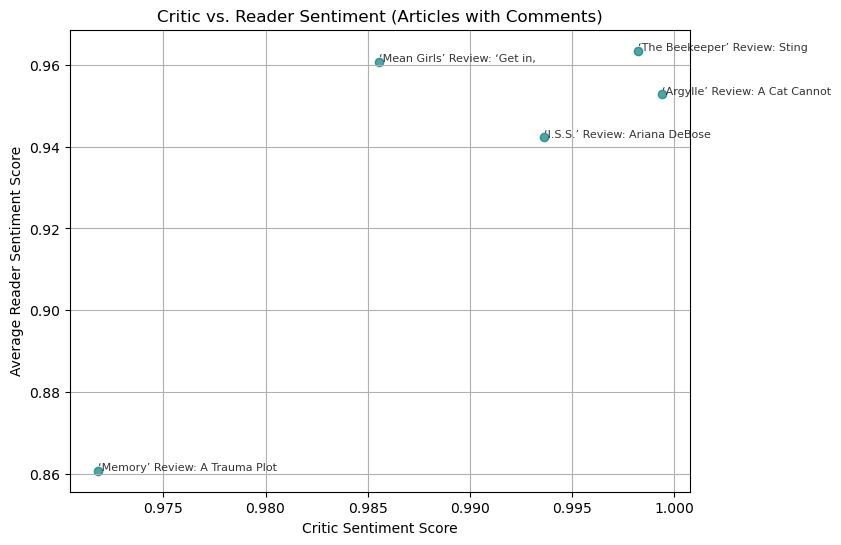

In [60]:
import matplotlib.pyplot as plt

if not valid_reviews.empty:
    plt.figure(figsize=(8,6))
    plt.scatter(valid_reviews["critic_score"], valid_reviews["avg_reader_score"], 
                color="teal", alpha=0.7)
    plt.xlabel("Critic Sentiment Score")
    plt.ylabel("Average Reader Sentiment Score")
    plt.title("Critic vs. Reader Sentiment (Articles with Comments)")
    plt.grid(True)

    # Optionally label points with the article headline
    for idx, row in valid_reviews.iterrows():
        plt.annotate(row["headline"][:30], 
                     (row["critic_score"], row["avg_reader_score"]),
                     fontsize=8, alpha=0.8)
    plt.show()
else:
    print("No articles with matching comments to visualize.")

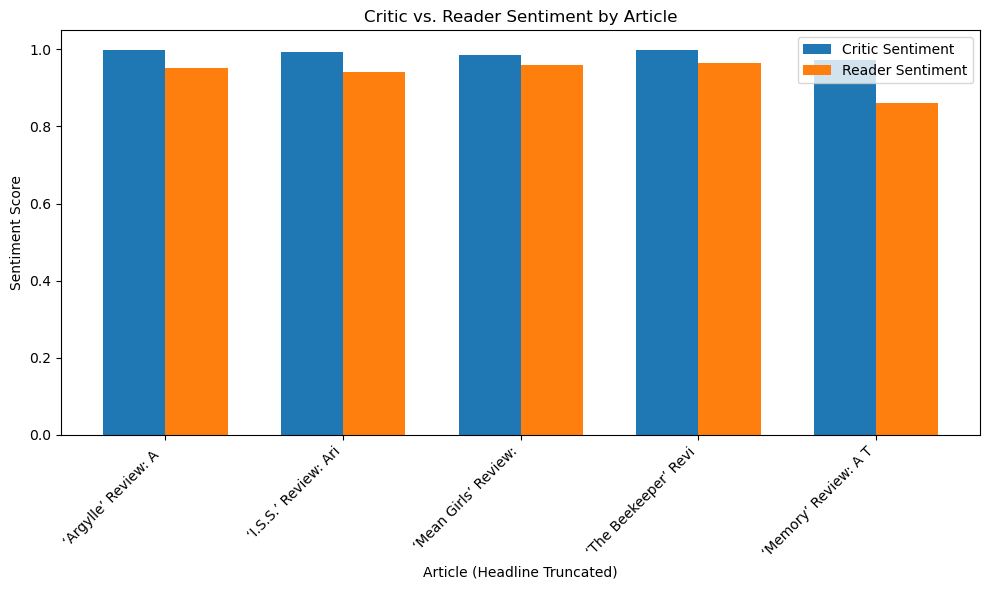

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Filter out rows that have no data for either sentiment
df_plot = merged_df.dropna(subset=["critic_score", "avg_reader_score"])

# If df_plot is empty, there's nothing to plot
if df_plot.empty:
    print("No articles with both critic and reader sentiment to visualize.")
else:
    # 2. Create a grouped bar chart
    #    - We'll index each row of df_plot, and place two bars side by side:
    #      one for critic_score, one for avg_reader_score.

    x = np.arange(len(df_plot))  # Numeric positions for each article
    width = 0.35  # The width of each bar

    plt.figure(figsize=(10, 6))

    # Bar for critic sentiment (shift left by width/2)
    plt.bar(x - width/2, df_plot["critic_score"], width, label="Critic Sentiment")

    # Bar for reader sentiment (shift right by width/2)
    plt.bar(x + width/2, df_plot["avg_reader_score"], width, label="Reader Sentiment")

    # 3. Format the x-axis to show truncated headlines
    #    - Convert the numeric positions back to article labels
    headlines = df_plot["headline"].str[:20]  # Truncate to first 20 characters
    plt.xticks(x, headlines, rotation=45, ha="right")

    # 4. Add labels and legend
    plt.xlabel("Article (Headline Truncated)")
    plt.ylabel("Sentiment Score")
    plt.title("Critic vs. Reader Sentiment by Article")
    plt.legend()

    # 5. Use tight_layout to prevent label cut-offs
    plt.tight_layout()
    plt.show()

In [62]:
# Critic sentiment stats for all 50 articles
critic_stats = critic_df["critic_score"].describe()
print("Critic Score Statistics (All 50 Articles):")
print(critic_stats)

# Reader comment sentiment stats for the 5 articles that have comments
# (comments_df likely has multiple comments per article, so this covers all comments from those 5 articles)
reader_stats = comments_df["comment_score"].dropna().describe()
print("\nReader Comment Score Statistics (From 5 Articles):")
print(reader_stats)

Critic Score Statistics (All 50 Articles):
count    50.000000
mean      0.953098
std       0.114536
min       0.534820
25%       0.972310
50%       0.993621
75%       0.998750
max       0.999833
Name: critic_score, dtype: float64

Reader Comment Score Statistics (From 5 Articles):
count    111.000000
mean       0.956228
std        0.104281
min        0.519084
25%        0.980236
50%        0.997207
75%        0.999299
max        0.999886
Name: comment_score, dtype: float64


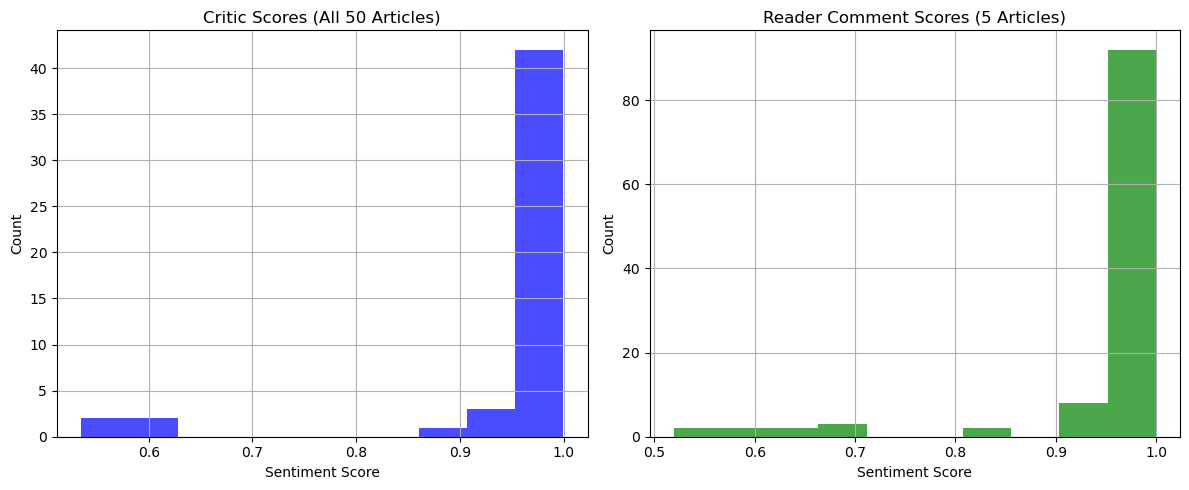

In [63]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# 1. Critic Score Histogram
critic_df["critic_score"].hist(ax=axs[0], bins=10, color="blue", alpha=0.7)
axs[0].set_title("Critic Scores (All 50 Articles)")
axs[0].set_xlabel("Sentiment Score")
axs[0].set_ylabel("Count")

# 2. Reader Comment Score Histogram
comments_df["comment_score"].dropna().hist(ax=axs[1], bins=10, color="green", alpha=0.7)
axs[1].set_title("Reader Comment Scores (5 Articles)")
axs[1].set_xlabel("Sentiment Score")
axs[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

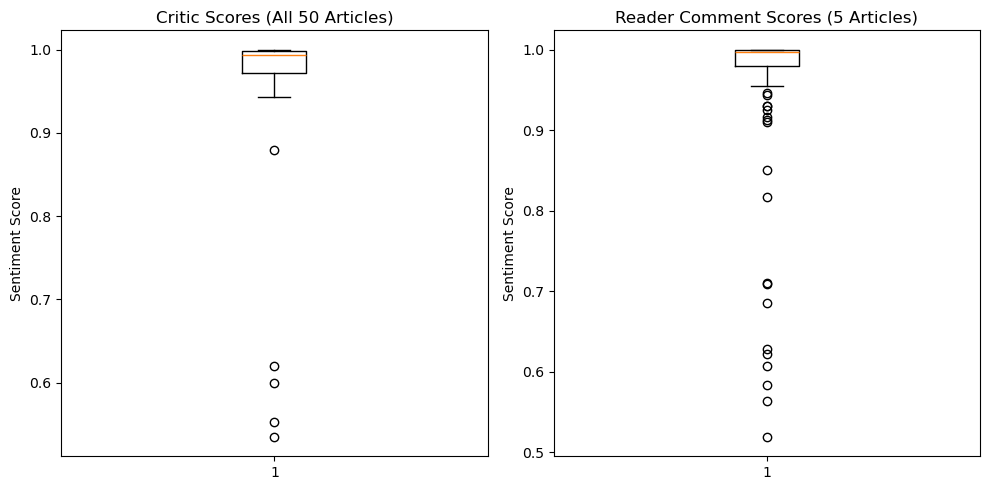

In [64]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Box plot for critic scores
axs[0].boxplot(critic_df["critic_score"].dropna(), vert=True)
axs[0].set_title("Critic Scores (All 50 Articles)")
axs[0].set_ylabel("Sentiment Score")

# Box plot for reader comment scores
axs[1].boxplot(comments_df["comment_score"].dropna(), vert=True)
axs[1].set_title("Reader Comment Scores (5 Articles)")
axs[1].set_ylabel("Sentiment Score")

plt.tight_layout()
plt.show()